In [41]:
# analise tentenças 
# analise sazonalidade




import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_matriculas.xlsx")

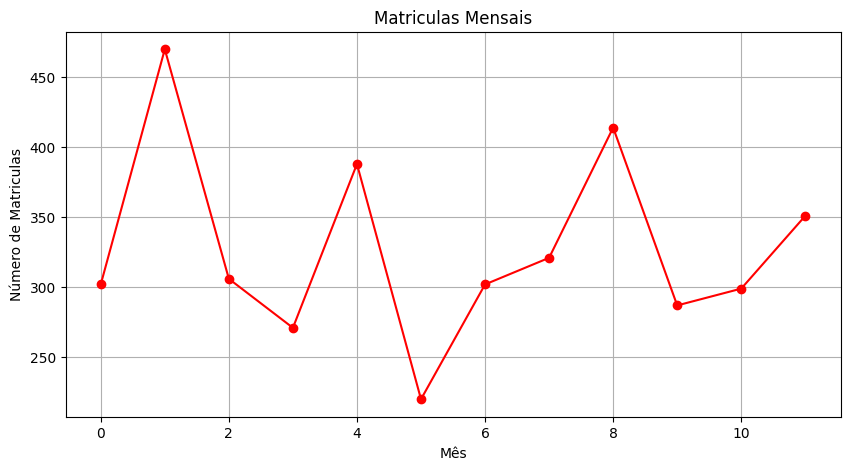

In [42]:
# Gráfico de matriculas mensais
# puxar informações de algo (df)


#titulo
#.x
#.y
#legenda


plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker="o", linestyle='-', color="red")
plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Número de Matriculas")
plt.grid(True)
plt.show()

In [43]:
# Identificar o Mês com maior e menor número de matriculas

maior_matricula = df["Matrículas"].max()
indice_maior_matricula = df["Matrículas"].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [44]:
menor_matricula = df["Matrículas"].min()
indice_menor_matricula = df["Matrículas"].idxmin()

print(menor_matricula)
print(indice_menor_matricula)

220
5


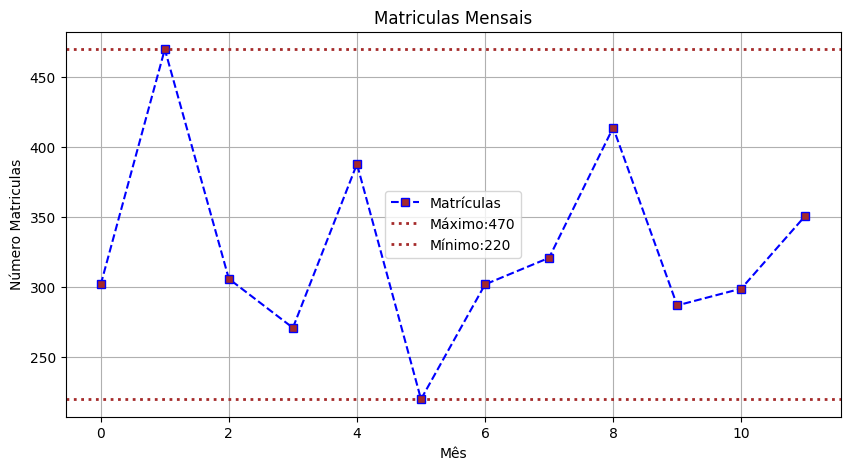

In [45]:
plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker="s", linestyle="--", color="blue", label="Matrículas", mfc="brown")

# Informações de Destaque
plt.axhline(y=maior_matricula, 
            color="brown", 
            linestyle=":", 
            linewidth=2, 
            label=f"Máximo:{maior_matricula}")

plt.axhline(y=menor_matricula,
            color="brown",
            linestyle=":",
            linewidth=2,
            label=f"Mínimo:{menor_matricula}")

plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Número Matriculas")
plt.grid(True)
plt.legend()
plt.show()

In [46]:
# Calculo Médio de matriculas mensais

media_matriculas = df["Matrículas"].mean()
print(media_matriculas)

327.5833333333333


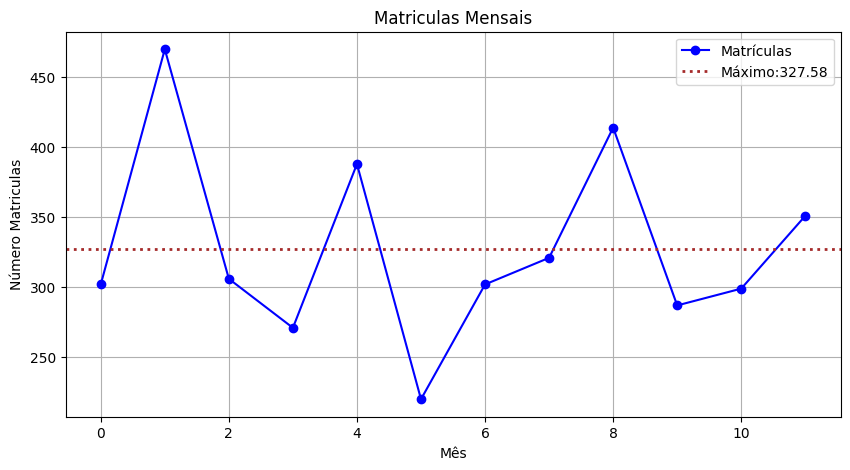

In [47]:
# Plotar o grafico das matriculas mensais e destacar a media

plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker="o", linestyle="-", color="blue", label="Matrículas")

# Informações de Destaque
plt.axhline(y=media_matriculas, 
            color="brown", 
            linestyle=":", 
            linewidth=2, 
            label=f"Máximo:{media_matriculas:.2f}")

plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Número Matriculas")
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# Tentenças 

# Calcular a media das mtriculas por trimestre

# Passo 1. Converter a coluna para datetime
df["Mês"] = pd.to_datetime(df["Mês"])

# Passo 2. Definir a coluna de datas como indice
df.set_index("Mês", inplace=True)

# Passo 3. Calcular a média trimestral
# QE / Trimestre
# QS / Semestre
# Q / Quadrimestre
# A / Anual
# D / Diário
# W / Semanal
# H / Horario
media_trimestral = df["Matrículas"].resample("QE").mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


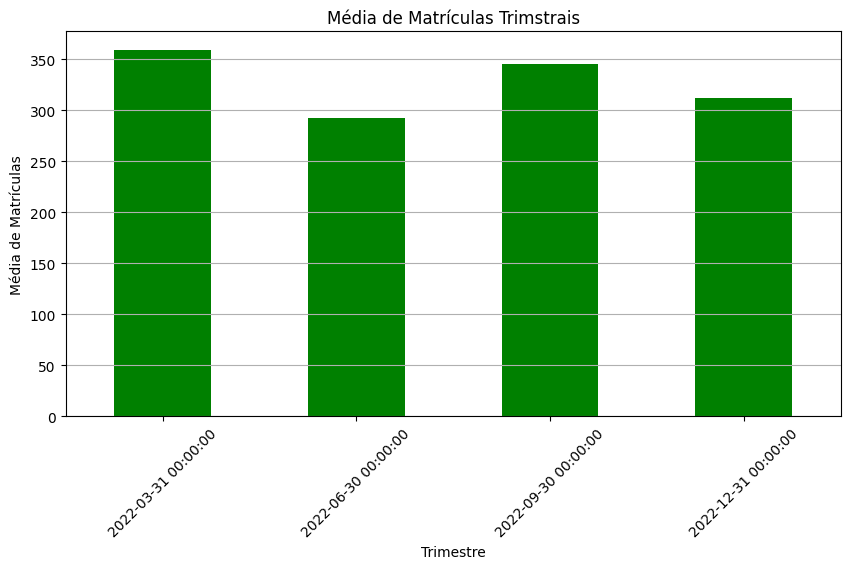

In [49]:
plt.figure(figsize=(10,5))
media_trimestral.plot(kind="bar", color="green")
plt.title("Média de Matrículas Trimstrais")
plt.xlabel("Trimestre")
plt.ylabel("Média de Matrículas")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

DESVIO SIMPLES

# Passo 1. Calcular Media
# Passo 2. Calcula o desvio em relação a media

JAN - 340
FEV - 345
MAR - 355
ABR - 600

MEDIA = 410

DESVIO
JAN = 340 - 410 = -70
FEV = 345 - 410 = -65
MAR = 355 - 410 = -55
ABR = 600 - 410 = 190


In [50]:
# Desvio Simples
df["Matrículas"] - df["Matrículas"].mean()

Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

VARIANCIA 

1. MEDIA
2. DESVIO SIMPLES

Passo 1. Valor do desvio elevado a 2

JAN = -70 ^2 = 4900
FEV = -65 ^2 = 4225
MAR = -55 ^2 = 3025
ABR = 190 ^2 = 36100

Passo 2. Media do desvio elevado
MEDIA = 12062.5

DESVIO PADRÃO

1. MEDIA
2. DESVIO SIMPLES
3. VARIANCIA

MEDIA = 12062.5
RAIZ QUADRADA DELE = 109.8

In [51]:
# Calcular a variação padrão
# variacao = df["Matrículas"].pct_change()

# Calcular a variação percentual mensal
variacao = df["Matrículas"].pct_change() * 100

In [53]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    "Matrícula": df["Matrículas"],
    "Variação Percentual %": variacao
})

def colorir_variacao(valor):
    if valor > 0:
        color = "green"
    elif valor < 0:
        color = "red"
    else:
        color = "blue"
    return f"color: {color}"

tabela_variacao.style.map(colorir_variacao, subset=["Variação Percentual %"])

,Matrícula,Variação Percentual %
Mês,,
2022-01-31 00:00:00,302,nan
2022-02-28 00:00:00,470,55.629139
2022-03-31 00:00:00,306,-34.893617
2022-04-30 00:00:00,271,-11.437908
2022-05-31 00:00:00,388,43.173432
2022-06-30 00:00:00,220,-43.298969
2022-07-31 00:00:00,302,37.272727
2022-08-31 00:00:00,321,6.291391
2022-09-30 00:00:00,414,28.971963
